# "*Simpson's paradox in Covid-19 case fatality rates: a mediation analysis of age-related causal effects*"

This interactive notebook accompanies the paper "*Simpson's paradox in Covid-19 case fatality rates: a mediation analysis of age-related causal effects*".
It contains the curated dataset (also attached in .csv form) and code to reproduce all our analyses and figures (incl. appendix), following the structure of the paper.

We include the most important definitions and formulas, as well as a few descriptions and comments to guide the reader; please refer to the main paper for details.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rc
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 1) Data

### Covid19Dataset `class`
In order to curate CFR data reported from different countries in a coherent format, we use the following `Covid19Dataset` class which requires at least a specification of the following information to create an instance:


*   country of reporting
*   date of reporting
*   absolute number of *confirmed* cases, separated into age groups (0-9, 10-19, etc)
*   absolute number of *confirmed* fatalities, separated into age groups (0-9, 10-19, etc)
*   a reliable source (in the form of a dictionary), generally either reports from a country's health ministry or a scientific publication


[Note of caution: numbers of confirmed cases and fatalities likely do not relfect the true numbers; additionally, relying on *confirmed* cases may introduce selection bias due to different approaches to testing, see the discussion section of our paper for further details.]

In [ ]:
class Covid19Dataset():
    """
    A class for datasets with case and fatality numbers stratified by age 
    group for different countries.
    """
    def __init__(self,
                country,
                date,
                confirmed_cases,
                fatalities,
                source,
                comments=None,
                age_ranges=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80+']
                ):
        self.country = country
        self.date = date
        self.confirmed_cases = np.array(confirmed_cases)
        self.fatalities = np.array(fatalities)
        self.source = source
        self.comments = comments
        self.age_ranges = age_ranges
        
        # compute quantities of interest
        self.cfr = self.fatalities/ self.confirmed_cases
        self.total_cases = sum(self.confirmed_cases)
        self.total_fatalities = sum(self.fatalities)
        self.case_rates_by_age = self.confirmed_cases/self.total_cases
        self.total_cfr = sum(self.case_rates_by_age * self.cfr)

## us nov 19

In [ ]:
US_nov19 = Covid19Dataset(
    country = 'US',
    date = '19 november', 
    confirmed_cases = [299040, 841450, 1635264, 1372623, 1267350, 1227493, 863260, 483689, 382869],
    fatalities = [71, 135, 850, 2261, 5397, 13973, 29957, 45450, 85461],
    source = {
        'type': 'scientific publication',
        'title': 'COVID-19 Case Surveillance Public Use Data',
        'author': '',
        'journal': '',
        'date': '19 Novemver 2020',
        'url': 'https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf'
        }
)

In [ ]:

trend = pd.read_csv('trend.csv')
trend.head()

,Date,Cases,Death
0,2020-11-20,"299040, 841450, 1635264, 1372623, 1267350, 122...","71, 135, 850, 2261, 5397, 13973, 29957, 45450,..."
1,2020-10-30,"224882, 639722, 1295431, 1085543, 1005300, 975...","58, 105, 791, 2102, 5125, 13304, 28383, 42520,..."
2,2020-10-15,"191449, 549461, 1138166, 952073, 883298, 85528...","55, 100, 744, 2002, 4926, 12768, 27109, 40248,..."
3,2020-09-30,"167670, 479147, 1024119, 862131, 800354, 77365...","54, 97, 708, 1920, 4782, 12352, 26066, 38320, ..."
4,2020-09-15,"148098, 411641, 915683, 782997, 727667, 703766...","51, 83, 680, 1868, 4601, 11887, 24985, 36583, ..."


In [ ]:

name = 'nov20, oct30, oct15, sep30, sep15, aug31, aug15, jul31, jul15, jun30, jun15, may30, may15, apr30, apr15, mar30, mar15, feb28, feb19'

In [ ]:
name = name.split(', ')

In [ ]:
d={}
for x in range(n):

    d["US_{0}".format(name[x])]= Covid19Dataset(
    country = 'US',
    date = trend.iloc[x,0], 
    confirmed_cases = list(map(float, trend.iloc[x,1].split(','))),
    fatalities = list(map(float, trend.iloc[x,2].split(','))),
    source = {
        'type': 'scientific publication',
        'title': 'COVID-19 Case Surveillance Public Use Data',
        'author': '',
        'journal': '',
        'date': trend.iloc[x,0],
        'url': 'https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf'
       
        }
    )
    

##minnesota dec 11


In [ ]:
MN_dec10 = Covid19Dataset(
    country = 'MN',
    date = '11 december', 
    confirmed_cases = [7187+9327, 14091+29310, 38549+33500, 30940+29381, 27560+26137, 26786+26457, 21793+14813, 11050+7897, 6127+4832+3216+1283+252],
    fatalities = [1, 0, 8, 29, 56, 75+113, 196+274, 407+497, 695+809+714+350+68],
    source = {
        'type': '',
        'title': 'Situation Update for COVID-19',
        'author': '',
        'journal': '',
        'date': '11 December 2020',
        'url': 'https://www.health.state.mn.us/diseases/coronavirus/situation.html#ageg1'
        }
)

## DC dec10

In [ ]:
DC_dec10 = Covid19Dataset(
    country = 'DC',
    date = '10 december', 
    confirmed_cases = [582, 1045+893, 5/0.01, 15/0.02, 26/0.04, 85/0.12, 165/0.23, 177/0.25, 236/0.33],
    fatalities = [0, 0, 5, 15, 26, 85, 165, 177, 236],
    source = {
        'type': '',
        'title': 'Situation Update for COVID-19',
        'author': '',
        'journal': '',
        'date': '10 December 2020',
        'url': 'https://coronavirus.dc.gov/data'
        }
)

## IL 

In [ ]:
IL_dec10 = Covid19Dataset(
    country = 'IL',
    date = '11 december', 
    confirmed_cases = [119711, 119711, 156710, 133908, 128970, 124213, 87147, 46366, 35621],
    fatalities = [0, 9, 43, 176, 406, 998, 2238, 3451, 6729],
    source = {
        'type': '',
        'title': '',
        'author': '',
        'journal': '',
        'date': '11 December 2020',
        'url': 'http://www.dph.illinois.gov/covid19/statistics'
        }
)

## China

### 17 February 2020

In [ ]:
China_Feb17 = Covid19Dataset(
    country = 'China',
    date = '17 February', 
    confirmed_cases = [416, 549, 3619, 7600, 8571, 10008, 8583, 3918, 1408],
    fatalities = [0, 1, 7, 18, 38, 130, 309, 312, 208],
    source = {
        'type': 'scientific publication',
        'title': 'Characteristics of and important lessons from the coronavirus\
            disease 2019 (COVID-19) outbreak in China: summary of a report of\
            72 314 cases from the Chinese Center for Disease Control and Prevention',
        'author': 'Wu, Zunyou and McGoogan, Jennifer M',
        'journal': 'Jama',
        'date': '24 February 2020',
        'url': 'https://jamanetwork.com/journals/jama/fullarticle/2762130'
        }
)

## Italy 

### 9 March 2020

In [ ]:
Italy_Mar9 = Covid19Dataset(
    country = 'Italy',
    date = '9 March', 
    confirmed_cases = [43, 85, 296, 470, 891, 1453, 1471, 1785, 1532],
    fatalities = [0, 0, 0, 0, 1, 3, 37, 114, 202],
    source = {
        'type': 'official report',
        'date': '9 March 2020, 4pm',
        'author': 'Istituto Superiore di Sanità \
            (ISS, Italian National Institute of Health)',
        'url': 'https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-\sorveglianza-integrata-COVID-19_09-marzo-2020.pdf'
        }
)

### Other Dates

## Other Countries 

In [ ]:
DiamondPrincess_Mar26 = Covid19Dataset(
    country = 'Diam. Princ.',
    date = '26 March', 
    confirmed_cases = [1, 5, 28, 34, 27, 59, 177, 234, 54],
    fatalities = [0, 0, 0, 0, 0, 0, 0, 3, 4],
    source = {
        'type': 'scientific publication',
        'title': 'Estimating the infection and case fatality ratio for coronavirus disease (COVID-19) using age-adjusted data from the outbreak on the Diamond Princess cruise ship, February 2020',
        'journal': 'Eurosurveillance',
        'date': '26 March 2020',
        'url': 'https://pubmed.ncbi.nlm.nih.gov/32234121/'
        }
)

    country = 'Netherlands',
    date = '28 May', 
    confirmed_cases = [128, 587, 4336, 4093, 5269, 8437, 5949, 6229, 10919],
    fatalities = [0, 1, 3, 10, 28, 142, 484, 1596, 3639],
    source = {
        'type': 'official report',
        'date': ' 28 May 2020',
        'author': 'Rijksinstituut voor Volksgezondheid en Milieu',
        'url': 'https://www.rivm.nl/documenten/epidemiologische-situatie-covid-19-in-nederland-28-mei-2020'
    }
)

Argentina_May28 = Covid19Dataset(
    country = 'Argentina',
    date = '28 May', 
    confirmed_cases = [1002, 1080, 2813, 3142, 2508, 1812, 1005, 651, 662],
    fatalities = [0, 1, 1, 9, 24, 54, 101, 123, 194],
    source = {
        'type': 'official ministry report',
        'author': 'Ministry of Health of Argentina',
        'date': '28 May 2020',
        'url': 'https://www.argentina.gob.ar/salud/coronavirus-COVID-19/sala-situacion'  # accessed 29 May
        }
)

Colombia_May28 = Covid19Dataset(
    country = 'Colombia',
    date = '28 May', 
    confirmed_cases = [1105, 1950, 5614, 5615, 4033, 3286, 1961, 1117, 685],
    fatalities = [5, 1, 13, 24, 61, 121, 192, 214, 191],
    source = {
        'type': 'official report of the government',
        'date': '28 May 2020, 7:30 pm',
        'author': 'Instituto Nacional de Salud',
        'url': 'https://www.ins.gov.co/Noticias/Paginas/Coronavirus.aspx'
        }
)

Netherlands_28May = Covid19Dataset(
    country = 'Netherlands',
    date = '28 May', 
    confirmed_cases = [128, 587, 4336, 4093, 5269, 8437, 5949, 6229, 10919],
    fatalities = [0, 1, 3, 10, 28, 142, 484, 1596, 3639],
    source = {
        'type': 'official report',
        'date': ' 28 May 2020',
        'author': 'Rijksinstituut voor Volksgezondheid en Milieu',
        'url': 'https://www.rivm.nl/documenten/epidemiologische-situatie-covid-19-in-nederland-28-mei-2020'
    }
)

Portugal_28May = Covid19Dataset(
    country = 'Portugal',
    date = '28 May', 
    confirmed_cases = [626, 1052, 4114, 4736, 5315, 5253, 3484, 2537, 4479],
    fatalities = [0, 0, 1, 1, 15, 42, 122, 269, 919],
    source = {
        'type': 'official report',
        'date': '28 May 2020 (data from 27 May 24:00)',
        'author': 'Servico Nacional de Saude Republica Portuguesa',
        'url': 'https://covid19.min-saude.pt/wp-content/uploads/2020/05/87_DGS_boletim_20200528.pdf'
    }
)

SouthAfrica_28May = Covid19Dataset(
    country = 'South Africa',
    date = '28 May', 
    confirmed_cases = [755, 1147, 5319, 7720, 5754, 3753, 1663, 754, 415],
    fatalities = [2, 1, 4, 33, 61, 144, 153, 113, 66],
    source = {
        'type': 'official report',
        'date': '28 May 2020 (data from 27 May 24:00)',
        'author': 'Health Department republic of South Africa',
        'url': 'https://sacoronavirus.co.za/2020/05/29/update-on-covid-19-28th-may-2020/' # accessed 29 May 2:00 am CEST
    }
)

Spain_May29 = Covid19Dataset(
    country = 'Spain',
    date = '29 May', 
    confirmed_cases = [1123, 2068, 15272, 24902, 37970, 45750, 36355, 34294, 61026],
    fatalities = [3, 5, 24, 65, 218, 663, 1825, 4896, 12886],
    source = {
        'type': 'official ministry report',
        'date': '29 May 2020 (data from 28 May, reviewed on 29 May, 12pm)',
        'author': 'Centro de Coordinación de Alertas y Emergencias Sanitarias \
             (CCAES), Ministerio de Sanidad, Consumo y Bienestar Social \
              (MISAN, Ministry of Health, Consumer Affairs and Social Welfare)',
        'url': 'https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/documentos/Actualizacion_120_COVID-19.pdf'
    },
)

Sweden_May18 = Covid19Dataset(
    country = 'Sweden',
    date = '18 May', 
    confirmed_cases = [168, 401, 3104, 4051, 4962, 6190, 4186, 3888, 7482],
    fatalities = [1, 0, 8, 12, 39, 129, 294, 909, 2733],
    source = {
        'type': 'official ministry report',
        'date': '? May 2020',
        'author': 'Folkhalsomyndigheten (Public Health Agency of Sweden))',
        'url': 'https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Sweden#cite_note-306' # accessed 29 May, 1am CEST
    },
)

Switzerland_May18 = Covid19Dataset(
    country = 'Switzerland',
    date = '18 May', 
    confirmed_cases = [157, 868, 3812, 4119, 4781, 6202, 3654, 2885, 4065],
    fatalities = [0, 0, 0, 5, 4, 34, 117, 327, 1116],
    source = {
        'type': 'official ministry report',
        'date': '18 May 2020 (8am)',
        'author': 'Federal Office of Public Health Switzerland',
        'url': 'https://www.bag.admin.ch/bag/en/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov/situation-schweiz-und-international.html#-1199962081'
    },
)

SouthKorea_May25 = Covid19Dataset(
    country = 'South Korea',
    date = '25 May', 
    confirmed_cases = [149, 636, 3117, 1235, 1481, 1987, 1375, 719, 491],
    fatalities = [0, 0, 0, 2, 3, 15, 39, 78, 129],
    source = {
        'type': 'official ministry report',
        'date': '24 May 2020, 00:00 KST',
        'author': 'Korea Centers for Disease Control and Prevention',
        'url': 'https://www.cdc.go.kr/board/board.es?mid=a20501000000&bid=0015&list_no=367317&act=view'
    },
)


       

# 2) Simpson’s paradox in comparing CFRs between China and Italy

In [ ]:
def autolabel(rects, ax, decimal_points=1, fontsize=10):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        text_offset = (0, 3) if height >= 0 else (-2, -13)
        ax.annotate(f"{height:.{decimal_points}f}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=text_offset,
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=fontsize)

def bar_chart_by_age(datasets, type, show_numbers=True, size=None):
    n_data = len(datasets)
    w = 1/n_data
    if size is not None:
        fig, ax = plt.subplots(figsize=size)
    
    else:
        fig, ax = plt.subplots()
    
    ax.set_xlabel('Age')
    ax.set_ylabel('%')
    i = 0
    for data in datasets:
        data_id  = data.country + ', ' + data.date
        if type == 'cases_by_age':
            labels = datasets[0].age_ranges    
            x = 1.25 * np.arange(len(labels))  # the label locations
            x_init = x - 0.5 + w/2
            ax.set_xticks(x)
            ax.set_xticklabels(labels)
            ax.set_title('Proportion of confirmed cases by age group')
            y = 100 * data.case_rates_by_age
            bar = ax.bar(x_init + i/n_data, y, w, label=data_id)
    
        elif type == 'cfr':
            labels = datasets[0].age_ranges + ['Total']  
            x = 1.25 * np.arange(len(labels))  # the label locations
            x_init = x - 0.5 + w/2
            ax.set_xticks(x)
            ax.set_xticklabels(labels)
            ax.set_ylabel('%')
            ax.set_title('Case fatality rates (CFRs) by age group')
            y = np.append(100*data.cfr, 100*data.total_cfr)
            bar = ax.bar(x_init + i/n_data, y, w, label=data_id)
        
        else:
            raise NotImplementedError
            print("Plot type not supported. Please choose between 'cases_by_age' and 'cfr'.")
        
        i += 1
        if show_numbers:
            autolabel(bar, ax)

    ax.legend()
    fig.tight_layout()
    plt.show()
    return fig


data_Simpson = [China_Feb17, Italy_Mar9]
fig = bar_chart_by_age(data_Simpson, 'cfr', show_numbers=False)
fig.savefig('ChinaItalyCFRs.jpg', transparent=True, bbox_inches='tight')

fig = bar_chart_by_age(data_Simpson, 'cases_by_age', show_numbers=False)
fig.savefig('ChinaItalyCFRsDemographic.jpg', transparent=True, bbox_inches='tight')

labels = '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'
sizes = [11.9, 11.6, 12.9, 15.9, 15, 15.4, 10.5, 5, 1.8]
explode = [0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1]  # only "explode" the last three slices

fig1, ax1 = plt.subplots()
ax1.set_title('China Population demographic')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig1.savefig('ChinaPopulationDemographic.jpg', transparent=True, bbox_inches='tight')

labels = '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'
sizes = [8.3, 9.5, 10.1, 11.6, 14.9, 15.8, 12.4, 10, 7.5]
explode = [0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1]  # only "explode" the last three slices

fig1, ax1 = plt.subplots()
ax1.set_title('Italy Population demographic')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig1.savefig('ItalyPopulationDemographic.jpg', transparent=True, bbox_inches='tight')

### comparison of CFRs between Sweden and Switzerland

In [ ]:
data_Simpson = [Sweden_May18, Switzerland_May18]
fig = bar_chart_by_age(data_Simpson, 'cfr', show_numbers=False)
fig.savefig('SwedenSwitzerlandCFRs.jpg', transparent=True, bbox_inches='tight')

labels = '0-14', '15-24', '25-54', '55-64','64+'
sizes = [17.71, 10.8, 39.01, 11.9, 20.59]
explode = [0, 0, 0, 0, 0.1]  # only "explode" the last three slices

fig1, ax1 = plt.subplots()
ax1.set_title('Sweden Population demographic')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig1.savefig('SwedenPopulationDemographic.jpg', transparent=True, bbox_inches='tight')

labels = '0-14', '15-24', '25-54', '55-64','64+'
sizes = [15.34, 10.39, 42.05, 13.48, 18.73]
explode = [0, 0, 0, 0, 0.1]  # only "explode" the last three slices

fig1, ax1 = plt.subplots()
ax1.set_title('Switzerland Population demographic')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig1.savefig('SwitzerlandPopulationDemographic.jpg', transparent=True, bbox_inches='tight')



### Comparison of CFRs of many countries

In [ ]:
latest_data_different_countries = [
                                   Argentina_May28,
                                   China_Feb17,  
                                   Colombia_May28,
                                   DiamondPrincess_Mar26,
                                   Italy_May26,
                                   Netherlands_28May,
                                   Portugal_28May,
                                   SouthAfrica_28May,
                                   Spain_May29,  
                                   Sweden_May18,
                                   Switzerland_May26,
                                   SouthKorea_May25
                                   ]
fig = bar_chart_by_age(latest_data_different_countries, 'cfr', show_numbers=False, size=(13,6))
fig.savefig('DifferentCountriesCFRsEvolution.jpg', transparent=True, bbox_inches='tight')

fig = bar_chart_by_age(latest_data_different_countries, 'cases_by_age', show_numbers=False, size=(13,6))
fig.savefig('DifferentCountriesCaseDemographicEvolution.jpg', transparent=True, bbox_inches='tight')

# 3) A causal model for Covid-19 CFR data



To better understand the (perhaps somewhat confusing) reversal pattern presented in 2), we now take a coarse-grained causal modelling perspective, in order to reason about different (direct and indirect) causal effects of country on mortality.

## Assumptions

We consider the following variables,


*   Country $C\in \{China, Italy, ...\}$,
*   Age-group $A\in\{\text{0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80+}\}$,
*   Mortality or medical outcome $M\in\{0,1\}$, with $M=1$ indicating death,

and assume the following causal relationships between them:

*  $C\rightarrow A$
*  $C\rightarrow M$
*  $A\rightarrow M$

In particular, note that, within this view, age $A$ is a *mediator* between country $C$ and mortality $M$.

In addition, all following calculations rest on the (admittedly strong) assumption of no hidden confounding to enable causal and counterfactual reasoning based on the available observational data.

# 4) Total, direct, and indirect (age-mediated) causal effects on mortality


Given the above assumptions about how the variables country $C$, age $A$, and mortality $M$ are causally related, we can now start to answer causal queries.

In the following, we review definitions of different causal effects and us them to anser different questions about Covid-19 CFR data.

## Total causal effect (TCE)



We start with the total causal effect (TCE) which describes the expected change in outcome under a change in treatment. 

---

**Definition.** The TCE of a treatment $T$ on an outcome $Y$ is defined as

$$TCE_{0\rightarrow 1} = \mathbb{E}[Y|do(T=1)] - \mathbb{E}[Y|do(T=0)].$$

---


In our case, we may be interested in the TCE of country on mortality, i.e., the question

> *``What would be the expected change in mortality (as measured by the total CFR) if the country were changed from China to Italy?''*

which can be answered by computing

$$TCE_{\text{China}\rightarrow\text{Italy}} = \mathbb{E}[M|do(C=\text{Italy})] - \mathbb{E}[M|do(C=\text{China})].$$

Since we assume causal sufficiency to overcome the lack of experimental data, this takes the form:

$$TCE_{\text{China}\rightarrow\text{Italy}} = \sum_a P_{A|C}(a|\text{Italy}) P_{M|A,C}(1|a,\text{Italy}) - P_{A|C}(a|\text{China}) P_{M|A,C}(1|a, \text{China})$$

which corresponds to the difference in total CFRs.

In [ ]:
def total_causal_effect(baseline, treatment):
  return treatment.total_cfr - baseline.total_cfr



Total CFR for China: 0.02290025071633238
Total CFR for Italy: 0.04448043857463244
TCE_China-->Italy =  2.158018785830006 %


This means that (subject to our assumptions), changing country from China to Italy would lead to an increase of 2.15% in overall CFR.

However, this does not tell us much about where this difference stems from. Instead, we may want to ask how much of the change in total CFR is due to the differences in case demographic noted earlier, and what proportion can be attributed to other country-specific factors. 
(Recall that within our view the TCE comprises both a direct effect of country on mortality, and an indirect effect mediated by age.) In other words, we want to better understand the role played by the mediating variable age.
We therefore now turn to the field of causal mediation analysis, which is concerned with quantifying such direct and indirect effects.

## Controlled direct effect (CDE)

First, we consider the controlled direct effect (CDE), which measures how much an outcome changes if the treatment is changed while keeping the mediator fixed at a given level.

---
**Definition.** The CDE of a treatment $T$ on an outcome $Y$ in presence of a mediator $X$ fixed at $x$ is given by

$$\text{CDE}_{0\rightarrow 1}(x)=\mathbb{E}\left[Y|do(T=1, X=x)\right]-\mathbb{E}\left[Y|do(T=0, X=x))\right].$$

---
In our case, we may want to reason about the CDE within a particular age group (e.g., 50-59 year olds), i.e., the question

> *``For 50--59 year-olds, is it safer to get the disease in China or in Italy?''*

which can be answered by computing

$$\text{CDE}_{\text{China}\rightarrow\text{Italy}}(a)=\mathbb{E}\left[M|do(C=\text{Italy}, A=a)\right]-\mathbb{E}\left[M|do(C=\text{China}, A=a)\right]$$

Given our assumptions, this reduces to

$$\text{CDE}_{\text{China}\rightarrow\text{Italy}}(a)= P_{M|A,C}(1|\text{Italy}, a)-P_{M|A,C}(1|\text{China}, a)$$

which corresponds to the difference of age-specific CFRs.


In [ ]:
def controlled_direct_effect(baseline, treatment, age_group_index):
    return treatment.cfr[age_group_index] - baseline.cfr[age_group_index]



CDE_China-->Italy(50-59) = -1.0848440940556217 %


This means that for that age group it would be safer in Italy with a lower age-specific CFR of ~1.1%.

## Natural direct effect (NDE)


As there are many CDEs (one for each age group), seeking a population-level measure we next turn to the natural direct effect (NDE) which captures how much the outcome would change if the treatment were changed while the mediator kept behaving as it would under the baseline or control.

---
**Definition.** The NDE of a treatment $T$ on an outcome $Y$ in presence of a mediator $X$ is given by 

$$\text{NDE}_{0\rightarrow 1}=\mathbb{E}\left[Y_{X_0}|do(T=1)\right]-\mathbb{E}\left[Y_{X_0}|do(T=0)\right].$$
 
where the subscript notation indicates the counterfactual outcome.

---


In our case, we may want to reason about the NDE of changing country from China to Italy, i.e., the question

> *“For the Chinese case demographic, would the Italian approach have been better?”*

which can be answered by computing

$$\text{NDE}_{\text{China}\rightarrow\text{Italy}}=\mathbb{E}\left[M_{A_\text{China}}|do(C=\text{Italy})\right]-\mathbb{E}\left[M_{A_\text{China}}|do(C=\text{China})\right]$$

Here, it takes the form:

$$\text{NDE}_{\text{China}\rightarrow\text{Italy}}= \sum_{a} P_{A|C}(a|\text{China})\left[P_{M|A,C}(1|\text{Italy}, a)-P_{M|A,C}(1|\text{China}, a)\right]$$ 


In [ ]:
def natural_direct_effect(baseline, treatment):
    return sum(baseline.case_rates_by_age * (treatment.cfr - baseline.cfr))


NDE_China --> Italy = -0.763238369493364 %


This suggests that when accounting for the case demographic, the Italian approach initially (i.e., on 9 March) resulted in lower CFR than *the Chinese approach*. 

## Natural indirect effect (NIE)

Finally, we turn to quantifying the indirect age-mediated effect using the notion of the natural indirect effect (NIE), which measures how much the outcome would change if the treatment were kept constant while the mediator behaved as it would under a change in treatment. 

---

**Definition.** The NIE of a treatment $T$ on an outcome $Y$ in presence of a mediator $X$ is given by the expression:

$$\text{NIE}_{0\rightarrow1}=\mathbb{E}[Y_{X_1}|do(T=0)]-\mathbb{E}[Y_{X_0}|do(T=0)].$$

---

In our case, we may want to reason about the NIE of changing country from China to Italy, i.e., the question

> *“How would the overallCFRin China change if the case demographic had instead been that186from Italy, while keeping all else (i.e., theCFR’s of each age group) the same?”*

which can be answered by computing

$$\text{NIE}_{\text{China}\rightarrow\text{Italy}}=\mathbb{E}[M_{A=A_\text{Italy}}|do(C=\text{China})]-\mathbb{E}[M_{A=A_\text{China}}|do(C=\text{China})].$$

Given our assumptions, this takes the form

$$\text{NIE}_{\text{China}\rightarrow\text{Italy}}= \sum_{a} \left[P_{A|C}(a|\text{Italy})- P_{A|C}(a|\text{China})\right] P_{M|A,C}(1|\text{China}, a)$$ 


In [ ]:
def natural_indirect_effect(baseline, treatment):
    return sum((treatment.case_rates_by_age - baseline.case_rates_by_age) * baseline.cfr)



NIE_China --> Italy = 3.2679727670571466 %


This means that only changing the case demographic from the Chinese one to that in Italy (while keeping all else the same) would lead to an increase in total CFR of ~3.3%.

# 4)  Case study: mediation analysis of age-related effects on Covid-19 CFRs 

## Tracing causal effects over time
While we have so far only considered the situation in Italy at the beginning of March, we now show the temporal evolution of TCE, NDE, and NIE of changing country from China to Italy over a period of ~11 weeks until end of May.

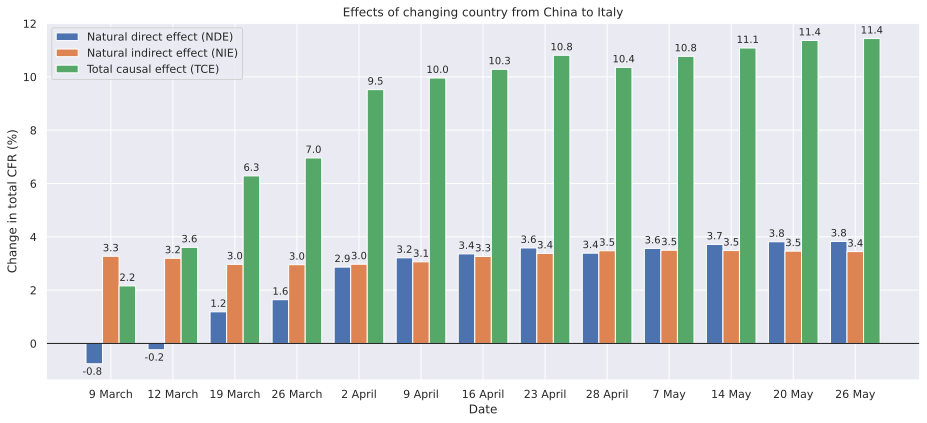

In [ ]:
def show_causal_effects_over_time(baseline, treatments, show_numbers=True, size=None):
    n_treatments = len(treatments)
    assert n_treatments > 0 and baseline is not None
    tc = treatments[0].country
    x = 1.25 * np.arange(n_treatments)
    w = 1/3
    x_init = x - 0.5 + w/2
    if size is not None:
        fig, ax = plt.subplots(figsize=size)
    
    else:
        fig, ax = plt.subplots()
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Change in total CFR (%)')
    ax.set_xticks(x)
    ax.set_title('Effects of changing country from '+baseline.country+' to '+tc)
    i = 0
    TCEs = []
    NDEs = []
    NIEs = []
    labels = []
    for treatment in treatments:
        assert treatment.country == tc
        TCEs.append(100 * total_causal_effect(baseline, treatment))
        NDEs.append(100 * natural_direct_effect(baseline, treatment))
        NIEs.append(100 * natural_indirect_effect(baseline, treatment))
        labels.append(treatment.date)

    bar1 = ax.bar(x_init, NDEs, w, label='Natural direct effect (NDE)')
    bar2 = ax.bar(x_init + w, NIEs, w, label='Natural indirect effect (NIE)')
    bar3 = ax.bar(x_init + 2 * w, TCEs, w, label=('Total causal effect (TCE)'))
    if show_numbers:
        autolabel(bar1, ax)
        autolabel(bar2, ax)
        autolabel(bar3, ax)

    ax.set_xticklabels(labels)
    plt.axhline(y=0,linewidth=1, color='k')
    ax.legend()
    fig.tight_layout()
    plt.show()
    return fig




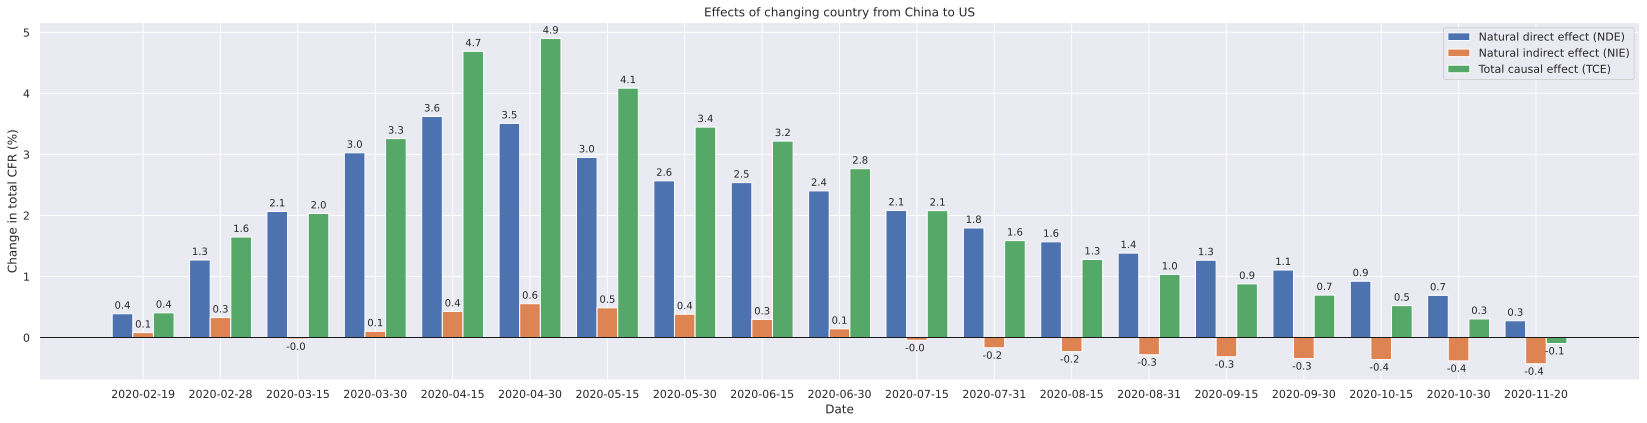

In [ ]:
temporal_data_US = list(d.values())
temporal_data_US = temporal_data_US[::-1]
fig = show_causal_effects_over_time(China_Feb17, temporal_data_US, size=(23,6))
fig.savefig('ChinaUSEffectsOverTime.pdf', transparent=True, bbox_inches='tight')

## Comparison between several different states

Next, we compare NDE and NIE across several different states in our dataset.

Data from MN contains 370488 cases and 4292 fatalities (CFR=1.2), reported on 11 december
Data from IL contains 952357 cases and 14050 fatalities (CFR=1.5), reported on 11 december
Data from DC contains 7268 cases and 709 fatalities (CFR=9.8), reported on 10 december
Analysed data from...
3  countries,
involving ...
1330113.8761528328  cases,
and ...
19051  fatalities.
Total cumulative CFR across all countries is: 
0.014322833812622372
NDE and NIE have opposite sign for...
2  pairs of countries


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Spearman correlation between rank by median age and rank by average NIE: 0.9370629370629372 6.99316495321054e-06
Spearman correlation between rank by NDE and rank by NIE: 0.034965034965034975 0.9140933424107598
Differences in ranking by NDE and NIE: [-5  3 -7 11 -1  0  3 -6  4 -3  1  0]


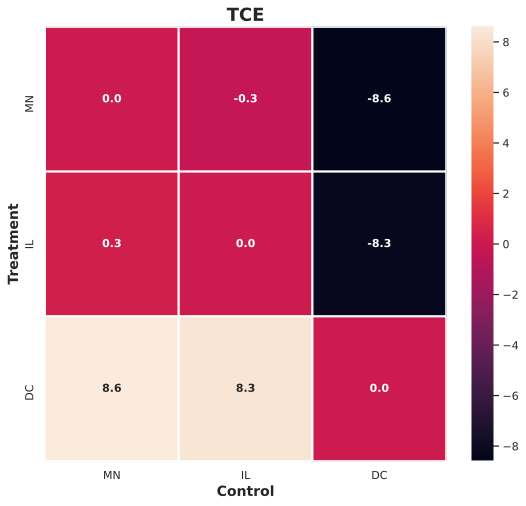

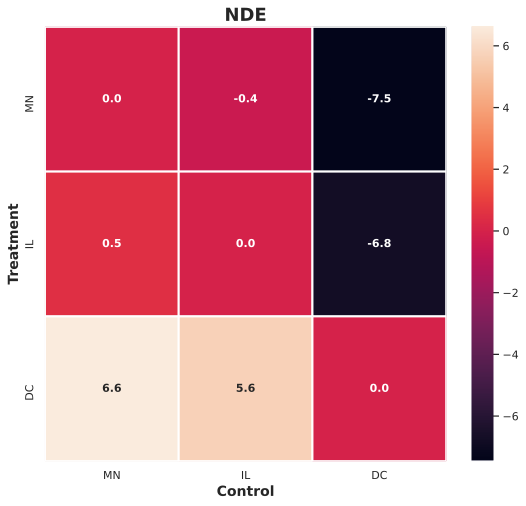

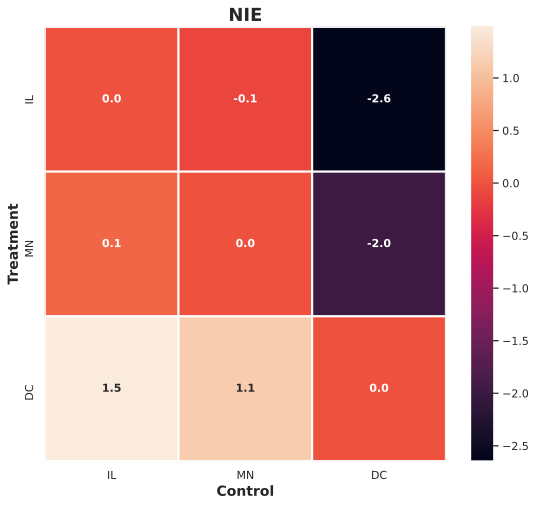

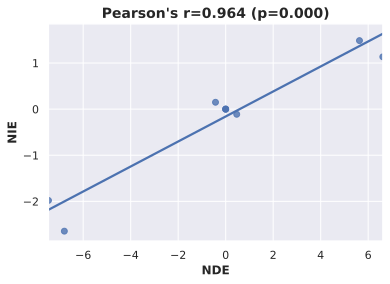

In [ ]:
def plot_effect_matrix(A, names, effect_type, add_title=True, size=8):
    f, ax = plt.subplots(figsize=(size+1, size))
    ax = sns.heatmap(100*A, annot=True, fmt=".1f", linewidths=2, annot_kws={"size": 11, "weight":'bold'}, xticklabels=names, yticklabels=names)
    ax.set_ylabel('Treatment', fontsize=14, fontweight='bold')
    ax.set_xlabel('Control', fontsize=14, fontweight='bold')
    if add_title:
        ax.set_title(effect_type, fontsize=18, fontweight='bold')
    
    f.savefig((effect_type+'.pdf'),bbox_inches='tight')
    return f

def sort_effect_matrix_by_row_mean(A, country_names):
    row_means = np.array([np.mean(A[i]) for i in range(A.shape[0])])
    sorted_indices = row_means.argsort()
    sorted_country_names = [country_names[i] for i in sorted_indices]
    B = A[sorted_indices,:]
    C = B[:, sorted_indices]
    return C, sorted_country_names

def plot_NIE_vs_NDE(NDEs, NIEs):
    f, ax = plt.subplots()
    ax = sns.regplot(100*NDEs, 100*NIEs, ci=None)
    ax.set_xlabel('NDE', fontsize=12, fontweight='bold')
    ax.set_ylabel('NIE', fontsize=12, fontweight='bold')
    R, p = stats.pearsonr(NDEs, NIEs)
    title = ("Pearson's r=%.3f (p=%.3f)" %(R, p))
    ax.set_title(title, fontsize=14, fontweight='bold')
    f.savefig('NIE_vs_NDE.pdf', bbox_inches='tight')
    return f

latest_data_different_countries = [
                                   MN_dec10,
                                   IL_dec10,
                                   DC_dec10
                                   ]

n_countries = len(latest_data_different_countries)
n_cases = 0
n_fatalities = 0 
country_names = []
TCEs = np.zeros((n_countries, n_countries))
NDEs = np.zeros((n_countries, n_countries))
NIEs = np.zeros((n_countries, n_countries))
for i in range(n_countries):
    # treatment country
    country1 = latest_data_different_countries[i]
    n_cases += country1.total_cases
    n_fatalities += country1.total_fatalities
    country_names.append(country1.country)
    print('Data from %s contains %d cases and %d fatalities (CFR=%.1f), reported on %s'
    %(country1.country, country1.total_cases, country1.total_fatalities, 100*country1.total_cfr, country1.date))
    for j in range(n_countries):
        # control/baseline country
        country2 = latest_data_different_countries[j]
        TCEs[i, j] = total_causal_effect(country2, country1)
        NDEs[i, j] = natural_direct_effect(country2, country1)
        NIEs[i, j] = natural_indirect_effect(country2, country1)

print('Analysed data from...')
print(n_countries, ' countries,')
print('involving ...')
print(n_cases, ' cases,')
print('and ...')
print(n_fatalities, ' fatalities.')
print('Total cumulative CFR across all countries is: ')
print(n_fatalities/n_cases)

print('NDE and NIE have opposite sign for...')
n_reversals = 0
for i in range(n_countries):
    for j in range(n_countries):
        if (NDEs[i,j]<0 and NIEs[i,j]>0) or (NDEs[i,j]>0 and NIEs[i,j]<0):
            n_reversals += 1

print(n_reversals, ' pairs of countries')


# sort effect matrices by average treatment effect and plot them in that order
TCEs_ordered, TCE_country_names_ordered = sort_effect_matrix_by_row_mean(TCEs, country_names)
NDEs_ordered, NDE_country_names_ordered = sort_effect_matrix_by_row_mean(NDEs, country_names)
NIEs_ordered, NIE_country_names_ordered = sort_effect_matrix_by_row_mean(NIEs, country_names)

f_TCE_ordered = plot_effect_matrix(TCEs_ordered, TCE_country_names_ordered, effect_type='TCE')
f_NDE_ordered = plot_effect_matrix(NDEs_ordered, NDE_country_names_ordered, effect_type='NDE')
f_NIE_ordered = plot_effect_matrix(NIEs_ordered, NIE_country_names_ordered, effect_type='NIE')


# scatter plot of NIE vs NDE with Pearson correlation
flattened_NDEs = NDEs.reshape(n_countries*n_countries)
flattened_NIEs = NIEs.reshape(n_countries*n_countries)
f_NIE_VS_NDE = plot_NIE_vs_NDE(flattened_NDEs, flattened_NIEs)


# investigate correlations between ranking in terms of NIE with median age and median case demographic
# the following data was used for median ages and ranking according to it
# data are listed as:  Country_rank_median-age (0 means oldest population) 
#              Argentina_9_31.7,
#              China_8_37.4,
#              Colombia_10_30.0
#              DiamondPrincess_0_58,  # mean instead of median
#              Italy_1_45.5,
#              Netherlands_3_42.6,
#              Portugal_5_42.2,
#              SouthAfrica_11_27.1,
#              Spain_2_42.7,
#              Sweden_7_41.2,
#              Switzerland_4_42.4,
#              SouthKorea_6_41.8

# order in which countries are listed: [ARG, CHI, COL, DP, IT, NETH, POR, SA, SPA, SWE, SWITZ, SK]
population_age_median_ranks = np.array([9, 8, 10, 0, 1, 3, 5, 11, 2, 7, 4, 6])  # 0 means oldest population
NIE_ranks = np.array([9, 7, 10, 0, 1, 2, 6, 11, 3, 4, 5, 8])  # 0 means highest average NIE when country is used as treatment
NDE_ranks = np.array([4, 10, 3, 11, 0, 2, 9, 5, 7, 1, 6, 8])  # 0 means highest average NDE when country is used as treatment

r_s, p_s = stats.spearmanr(population_age_median_ranks, NIE_ranks)
print('Spearman correlation between rank by median age and rank by average NIE:', r_s, p_s)
r, p = stats.spearmanr(NDE_ranks, NIE_ranks)
print('Spearman correlation between rank by NDE and rank by NIE:', r, p)
print('Differences in ranking by NDE and NIE:', NDE_ranks-NIE_ranks)